In [1]:
#Importing libraries
import os 
import scipy
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 40)




In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [2]:
#displaying dataframe 
df = pd.read_csv('C:\\Users\\Okwua\\listings.csv')
df.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20201212211823   2020-12-13   
1  20168  https://www.airbnb.com/rooms/20168  20201212211823   2020-12-13   
2  25428  https://www.airbnb.com/rooms/25428  20201212211823   2020-12-13   
3  27886  https://www.airbnb.com/rooms/27886  20201212211823   2020-12-13   
4  28871  https://www.airbnb.com/rooms/28871  20201212211823   2020-12-13   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1       Studio with private bathroom in the centre 1   
2    Lovely apt in City Centre (w.lift) near Jordaan   
3  Romantic, stylish B&B houseboat in canal district   
4                            Comfortable double room   

                                         description  \
0  Quiet Garden View Room & Super Fast WiFi<br />...   
1  17th century Dutch townhouse in the heart of t...   
2  Lovely apt in Centre ( lift & fireplace) near ...   
3  Stylish and romantic houseboat on fantastic hi...   
4  <b>The space</b><br />In a monumental house ri...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Located just in between famous central canals....   
2                                                NaN   
3         Central, quiet, safe, clean and beautiful.   
4       Flower market , Leidseplein , Rembrantsplein   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159   
1  https://a0.muscache.com/pictures/69979628/fd6a...    59484   
2  https://a0.muscache.com/pictures/138431/7079a9...    56142   
3  https://a0.muscache.com/pictures/02c2da9d-660e...    97647   
4  https://a0.muscache.com/pictures/160889/362340...   124245   

                                   host_url  host_name  host_since  \
0    https://www.airbnb.com/users/show/3159     Daniel  2008-09-24   
1   https://www.airbnb.com/users/show/59484  Alexander  2009-12-02   
2   https://www.airbnb.com/users/show/56142       Joan  2009-11-20   
3   https://www.airbnb.com/users/show/97647       Flip  2010-03-23   
4  https://www.airbnb.com/users/show/124245      Edwin  2010-05-13   

                               host_location  \
0  Amsterdam, Noord-Holland, The Netherlands   
1  Amsterdam, Noord-Holland, The Netherlands   
2          New York, New York, United States   
3  Amsterdam, Noord-Holland, The Netherlands   
4  Amsterdam, Noord-Holland, The Netherlands   

                                          host_about host_response_time  \
0  Upon arriving in Amsterdam, one can imagine as...                NaN   
1                  + (Phone number hidden by Airbnb)                NaN   
2  We are a retired couple who live in NYC, and h...     within an hour   
3  Marjan works in "eye" the dutch filmmuseum, an...     within an hour   
4                                                 Hi     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                 100%                 t   
1                NaN                 100%                 f   
2               100%                  57%                 t   
3               100%                 100%                 t   
4               100%                  92%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/3159/profile_...   
1  https://a0.muscache.com/im/pictures/user/65092...   
2  https://a0.muscache.com/im/users/56142/profile...   
3  https://a0.muscache.com/im/users/97647/profile...   
4  https://a0.muscache.com/im/pictures/user/9986b...   

                                    host_picture_url  ...  \
0  https://a0.muscache.com/im/users/3159/profile_...  ...   
1  https://a0.muscache.com/im/pictures/user/65092...  ...   
2  https://a0.muscache.com/im/users/56142/profile...  ...   
3  https://a0.muscac

## Question 1a

In [3]:
def drop_cols(df):
  """Takes dataframe(df) as input and returns a reduced dataset after dropping the 
     variables in the list(var)"""
  
  var=['scrape_id','last_scraped','description','listing_url','neighbourhood',
       'calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url',
       'host_url', 'host_about','host_location','host_total_listings_count',
       'host_thumbnail_url','host_picture_url','host_verifications','bathrooms_text',
       'has_availability','minimum_minimum_nights','maximum_minimum_nights',
       'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
  df=df.drop([x for x in var if x in df.columns], axis=1)  
  return df

In [4]:
#call to function 
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [5]:
def drop_cols_na(df, threshold):
  """Recieves dataframe(df) and threshold as arguements and drops columns based on the threshold percentage of NANs"""
  threshold= len(df) * 0.5 #specifying threshold percentage 
  df=df.dropna(axis=1, thresh=threshold)  #dropping columns with 50% NANs
  return df

In [6]:
#calling the function
df = drop_cols_na(df,0.5)
df

id                                               name    host_id  \
0          2818           Quiet Garden View Room & Super Fast WiFi       3159   
1         20168       Studio with private bathroom in the centre 1      59484   
2         25428    Lovely apt in City Centre (w.lift) near Jordaan      56142   
3         27886  Romantic, stylish B&B houseboat in canal district      97647   
4         28871                            Comfortable double room     124245   
...         ...                                                ...        ...   
18517  46938808                                      NiceAmsterdam  379294518   
18518  46940774           Fantastic Apartment with beautiful views  279181956   
18519  46944602                        cozy apartment in amsterdam  375398295   
18520  46953753           Great luxurious apartment in city centre  379498141   
18521  46960026         Classic houseboat in Amsterdam city centre  213284349   

       host_name  host_since host_acceptance_rate host_is_superhost  \
0         Daniel  2008-09-24                 100%                 t   
1      Alexander  2009-12-02                 100%                 f   
2           Joan  2009-11-20                  57%                 t   
3           Flip  2010-03-23                 100%                 t   
4          Edwin  2010-05-13                  92%                 t   
...          ...         ...                  ...               ...   
18517  Elizabeth  2020-12-10                  NaN                 f   
18518      Ramon  2019-07-25                  NaN                 f   
18519     Danila  2020-11-12                 100%                 f   
18520       Lisa  2020-12-11                  NaN                 f   
18521     Jochum  2018-09-03                  90%                 f   

          host_neighbourhood  host_listings_count host_has_profile_pic  \
0             Indische Buurt                  1.0                    t   
1             Grachtengordel                  2.0                    t   
2             Grachtengordel                  2.0                    t   
3        Westelijke Eilanden                  1.0                    t   
4          Amsterdam Centrum                  2.0                    t   
...                      ...                  ...                  ...   
18517                    NaN                  0.0                    t   
18518                    NaN                  2.0                    t   
18519                    NaN                  2.0                    t   
18520                    NaN                  1.0                    t   
18521  Nieuwmarkt en Lastage                  1.0                    t   

      host_identity_verified                  neighbourhood_cleansed  \
0                          t  Oostelijk Havengebied - Indische Buurt   
1                          t                            Centrum-Oost   
2                          f                            Centrum-West   
3                          t                            Centrum-West   
4                          t                            Centrum-Oost   
...                      ...                                     ...   
18517                      f                            Centrum-Oost   
18518                      f                            Centrum-Oost   
18519                      t                 De Pijp - Rivierenbuurt   
18520                      t                            Centrum-Oost   
18521                      t  Oostelijk Havengebied - Indische Buurt   

       latitude  longitude              property_type        room_type  \
0      52.36575    4.94142  Private room in apartment     Private room   
1      52.36509    4.89354  Private room in townhouse     Private room   
2      52.37297    4.88339           Entire apartment  Entire home/apt   
3      52.38761    4.89188  Private room in houseboat     Private room   
4      52.36610    4.88953  Private room in apartment     Priva

## Question 1b

In [7]:
def binary_encoding(df):
  """Encodes all columns with binary notation t and f"""
  for columns in df:
    df.replace({'f': 0,'t': 1}, inplace=True) # encoding binary variables 
  return df

In [8]:
df = binary_encoding(df)
df

id                                               name    host_id  \
0          2818           Quiet Garden View Room & Super Fast WiFi       3159   
1         20168       Studio with private bathroom in the centre 1      59484   
2         25428    Lovely apt in City Centre (w.lift) near Jordaan      56142   
3         27886  Romantic, stylish B&B houseboat in canal district      97647   
4         28871                            Comfortable double room     124245   
...         ...                                                ...        ...   
18517  46938808                                      NiceAmsterdam  379294518   
18518  46940774           Fantastic Apartment with beautiful views  279181956   
18519  46944602                        cozy apartment in amsterdam  375398295   
18520  46953753           Great luxurious apartment in city centre  379498141   
18521  46960026         Classic houseboat in Amsterdam city centre  213284349   

       host_name  host_since host_acceptance_rate  host_is_superhost  \
0         Daniel  2008-09-24                 100%                1.0   
1      Alexander  2009-12-02                 100%                0.0   
2           Joan  2009-11-20                  57%                1.0   
3           Flip  2010-03-23                 100%                1.0   
4          Edwin  2010-05-13                  92%                1.0   
...          ...         ...                  ...                ...   
18517  Elizabeth  2020-12-10                  NaN                0.0   
18518      Ramon  2019-07-25                  NaN                0.0   
18519     Danila  2020-11-12                 100%                0.0   
18520       Lisa  2020-12-11                  NaN                0.0   
18521     Jochum  2018-09-03                  90%                0.0   

          host_neighbourhood  host_listings_count  host_has_profile_pic  \
0             Indische Buurt                  1.0                   1.0   
1             Grachtengordel                  2.0                   1.0   
2             Grachtengordel                  2.0                   1.0   
3        Westelijke Eilanden                  1.0                   1.0   
4          Amsterdam Centrum                  2.0                   1.0   
...                      ...                  ...                   ...   
18517                    NaN                  0.0                   1.0   
18518                    NaN                  2.0                   1.0   
18519                    NaN                  2.0                   1.0   
18520                    NaN                  1.0                   1.0   
18521  Nieuwmarkt en Lastage                  1.0                   1.0   

       host_identity_verified                  neighbourhood_cleansed  \
0                         1.0  Oostelijk Havengebied - Indische Buurt   
1                         1.0                            Centrum-Oost   
2                         0.0                            Centrum-West   
3                         1.0                            Centrum-West   
4                         1.0                            Centrum-Oost   
...                       ...                                     ...   
18517                     0.0                            Centrum-Oost   
18518                     0.0                            Centrum-Oost   
18519                     1.0                 De Pijp - Rivierenbuurt   
18520                     1.0                            Centrum-Oost   
18521                     1.0  Oostelijk Havengebied - Indische Buurt   

       latitude  longitude              property_type        room_type  \
0      52.36575    4.94142  Private room in apartment     Private room   
1      52.36509    4.89354  Private room in townhouse     Private room   
2      52.37297    4.88339           Entire apartment  Entire home/apt   
3      52.38761    4.89188  Private room in houseboat     Private room   
4      52.36610    4.88953 

In [9]:
def add_host_days(df):
  """Creates a new column which represents the number of days the host has 
  been registered"""
  df.host_since = pd.to_datetime(df.host_since) 
  df['host_days'] = (pd.to_datetime('today') - df.host_since).astype('timedelta64[D]')#creatng host_days column
  return df

In [10]:
def convert_price(df):
  """Takes dataframe as input and converts the type of the price variable from string to float"""
  
  df['price'] = df['price'].str.replace('$', '')#replace dollar sign 
  df['price'] = df['price'].str.replace(',', '')#replacing commas in the prices 
  df[['price']] = df[['price']].astype('float')#converting price to type float 
  return df

In [11]:
#calling both functions 
df = add_host_days(df)
df = convert_price(df)
df

id                                               name    host_id  \
0          2818           Quiet Garden View Room & Super Fast WiFi       3159   
1         20168       Studio with private bathroom in the centre 1      59484   
2         25428    Lovely apt in City Centre (w.lift) near Jordaan      56142   
3         27886  Romantic, stylish B&B houseboat in canal district      97647   
4         28871                            Comfortable double room     124245   
...         ...                                                ...        ...   
18517  46938808                                      NiceAmsterdam  379294518   
18518  46940774           Fantastic Apartment with beautiful views  279181956   
18519  46944602                        cozy apartment in amsterdam  375398295   
18520  46953753           Great luxurious apartment in city centre  379498141   
18521  46960026         Classic houseboat in Amsterdam city centre  213284349   

       host_name host_since host_acceptance_rate  host_is_superhost  \
0         Daniel 2008-09-24                 100%                1.0   
1      Alexander 2009-12-02                 100%                0.0   
2           Joan 2009-11-20                  57%                1.0   
3           Flip 2010-03-23                 100%                1.0   
4          Edwin 2010-05-13                  92%                1.0   
...          ...        ...                  ...                ...   
18517  Elizabeth 2020-12-10                  NaN                0.0   
18518      Ramon 2019-07-25                  NaN                0.0   
18519     Danila 2020-11-12                 100%                0.0   
18520       Lisa 2020-12-11                  NaN                0.0   
18521     Jochum 2018-09-03                  90%                0.0   

          host_neighbourhood  host_listings_count  host_has_profile_pic  \
0             Indische Buurt                  1.0                   1.0   
1             Grachtengordel                  2.0                   1.0   
2             Grachtengordel                  2.0                   1.0   
3        Westelijke Eilanden                  1.0                   1.0   
4          Amsterdam Centrum                  2.0                   1.0   
...                      ...                  ...                   ...   
18517                    NaN                  0.0                   1.0   
18518                    NaN                  2.0                   1.0   
18519                    NaN                  2.0                   1.0   
18520                    NaN                  1.0                   1.0   
18521  Nieuwmarkt en Lastage                  1.0                   1.0   

       host_identity_verified                  neighbourhood_cleansed  \
0                         1.0  Oostelijk Havengebied - Indische Buurt   
1                         1.0                            Centrum-Oost   
2                         0.0                            Centrum-West   
3                         1.0                            Centrum-West   
4                         1.0                            Centrum-Oost   
...                       ...                                     ...   
18517                     0.0                            Centrum-Oost   
18518                     0.0                            Centrum-Oost   
18519                     1.0                 De Pijp - Rivierenbuurt   
18520                     1.0                            Centrum-Oost   
18521                     1.0  Oostelijk Havengebied - Indische Buurt   

       latitude  longitude              property_type        room_type  \
0      52.36575    4.94142  Private room in apartment     Private room   
1      52.36509    4.89354  Private room in townhouse     Private room   
2      52.37297    4.88339           Entire apartment  Entire home/apt   
3      52.38761    4.89188  Private room in houseboat     Private room   
4      52.36610    4.88953  Private roo

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [12]:
# Number of hosts who offer 2 or more properties for rent?
host_properties_count= df[df['host_listings_count'] >= 2.0].groupby('host_id').count()
host_properties_count.shape[0]

2077

In [13]:
# The highest price for a listing?
df['price'].max()

8000.0

In [14]:
# The ID of the listing that has the largest number of bedrooms?
df.iloc[df['bedrooms'].idxmax()]['id']

46015289

In [15]:
# The ID of the listing with the largest advertised price?
df.iloc[df['price'].idxmax()]['id']

258273

In [16]:
# The number of listings for the most common room type?
common_room_type=df['room_type'].value_counts().idxmax()
df_common_room_type= df[df['room_type'] ==common_room_type]
df_common_room_type.shape[0]

14433

In [17]:
# Number of hosts registered for more than 3000 days?
host_reg_properties= df[df['host_days'] > 3000.0]
host_reg_properties.shape[0]

5182

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

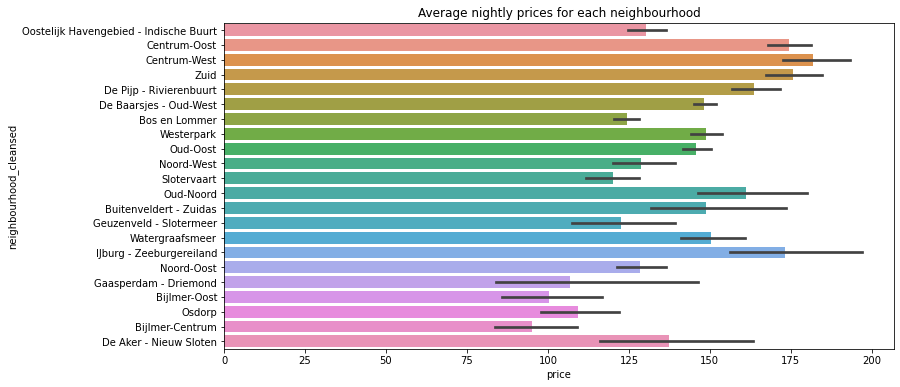

In [18]:
#barplot of the average nightly price per neighbourhood 
plt.figure(figsize=(12,6)) #specifying figure size 
ax=sns.barplot(x="price",y="neighbourhood_cleansed",data=df)#specifying variables on x and y axes and dataframe
plt.title("Average nightly prices for each neighbourhood");

Plot a correlation matrix as instructed in the Coursework proforma:

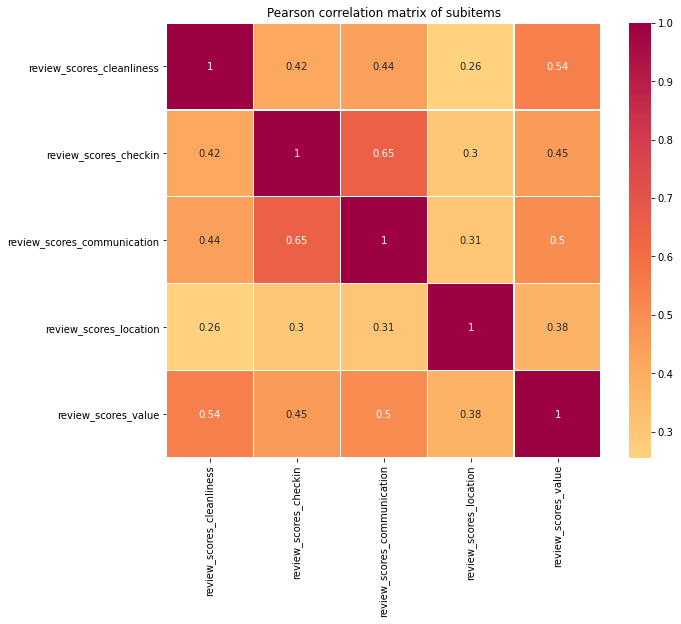

In [19]:
#Pair-wise Pearson correllation matrix between unique values of review_ratings variable 
fig,ax=plt.subplots(figsize=(10,8)) #specifying figure size 
C = df.loc[:,'review_scores_cleanliness':'review_scores_value'].corr() # correlation between unique values in review ratings 
sns.heatmap(C, square=True,annot=True,linewidths=0.5,center=0,cmap='Spectral_r');
ax.set_title('Pearson correlation matrix of subitems');

Plot a geographical distribution as instructed in the Coursework proforma:

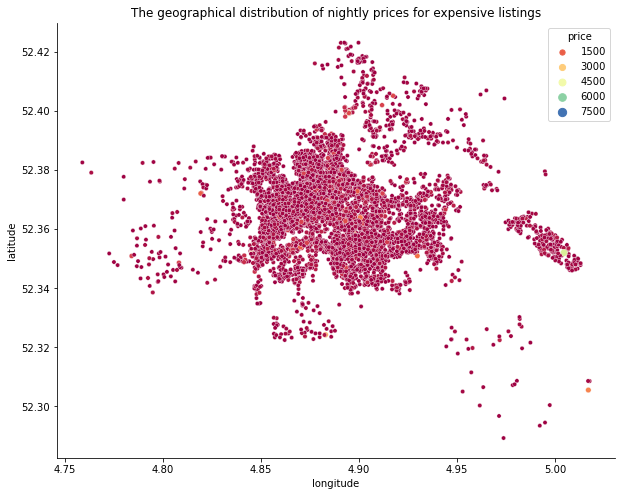

In [20]:
# scatter plot of the geographical distribution of nightly prices for expensive listings
high_price= df[df['price'] > 150]                  #selecting listings greater than $150
plt.figure(figsize=(10,8))                         #specyfing plot size
ax=sns.scatterplot(data=high_price, x="longitude", #providing x and y coordinates and encoding the size and color using price variable 
                   y="latitude",hue="price", 
                   size="price",palette='Spectral') 
ax.set_title('The geographical distribution of nightly prices for expensive listings')
sns.despine();

# Statistical analysis

## Linear regression and t-tests


In [21]:
#Linear regression to investigate the predictability of overall review rating from it's subitems 
df = df.rename(columns = {'review_scores_accuracy': 'accuracy', 'review_scores_cleanliness': 'cleanliness','review_scores_checkin'
                         :'checkin','review_scores_communication':'communication','review_scores_location': 'location',
                         'review_scores_value': 'value'}, inplace = False) #renaming columns for better readability 
fit = sm.OLS.from_formula('review_scores_rating ~ accuracy +cleanliness + checkin +communication + location + value', df).fit()
print(fit.summary()) #renaming columns to enhance readability 


                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.726
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     7008.
Date:                  Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                          19:18:00   Log-Likelihood:                -42957.
No. Observations:                 15880   AIC:                         8.593e+04
Df Residuals:                     15873   BIC:                         8.598e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169  

Linear regression question

From the summary we observe that the sub-items(independent variables) account for 0.726(72.6%) of the variation in the overall rating, 
and their pvalues are all significant(< 0.05),so the overall rating can be predicted from the subitems,we therefore reject the null hypothesis.

In [22]:
#Extracting prices of different the room types 
df1 = df[df['room_type']=='Private room']['price'].dropna()
df2 = df[df['room_type']=='Entire home/apt']['price'].dropna()
df3 = df[df['room_type']=='Hotel room']['price'].dropna()
df4 = df[df['room_type']=='Shared room']['price'].dropna()

In [23]:
# multiple ttests of room_type pairs to investigate significance in price difference 

alpha=0.01  #significance level

res_1 = scipy.stats.ttest_ind(df1, df2)
if res_1.pvalue < alpha:
  print('Private room vs Entire home/apt p-value: {:.10f}'.format(ttest_ind(df1, df2).pvalue))
res_2= scipy.stats.ttest_ind(df1, df3)
if res_2.pvalue < alpha:
  print('Private room vs Hotel room p-value: {:.10f}'.format(ttest_ind(df1, df3).pvalue))
res_3= scipy.stats.ttest_ind(df1, df4)
if res_3.pvalue < alpha:
  print('Private room vs Shared room: {:.10f}'.format(ttest_ind(df1, df4).pvalue))
res_4= scipy.stats.ttest_ind(df2, df3)
if res_4.pvalue < alpha:
  print('Entire home/apt vs Hotel room p-value: {:.10f}'.format(ttest_ind(df2, df3).pvalue))
res_5= scipy.stats.ttest_ind(df2, df4)
if res_5.pvalue < alpha:
  print('Entire home/apt vs Shared room p-value: {:.10f}'.format(ttest_ind(df2, df4).pvalue))
res_6= scipy.stats.ttest_ind(df3, df4)
if res_6.pvalue < alpha:
  print('Hotel room  vs Shared room p-value: {:.10f}'.format(ttest_ind(df3, df4).pvalue))


Private room vs Entire home/apt p-value: 0.0000000000
Private room vs Hotel room p-value: 0.0000596655
Entire home/apt vs Hotel room p-value: 0.0029292209
Entire home/apt vs Shared room p-value: 0.0021768319


In [24]:
#Bonferroni correction to compensate for any bias as a result of multiple hypothesis testing 

alpha=0.01   # initial significance level 
no_test= 6   # number of hypothesis 
Threshold=alpha/no_test     # new significance level 


res_1 = scipy.stats.ttest_ind(df1, df2)
if res_1.pvalue < Threshold:
  print('Private room vs Entire home/apt p-value: {:.10f}'.format(ttest_ind(df1, df2).pvalue))
res_2= scipy.stats.ttest_ind(df1, df3)
if res_2.pvalue < Threshold:
  print('Private room vs Hotel room p-value: {:.10f}'.format(ttest_ind(df1, df3).pvalue))
res_3= scipy.stats.ttest_ind(df1, df4)
if res_3.pvalue < Threshold:
  print('Private room vs Shared room: {:.10f}'.format(ttest_ind(df1, df4).pvalue))
res_4= scipy.stats.ttest_ind(df2, df3)
if res_4.pvalue < Threshold:
  print('Entire home/apt vs Hotel room p-value: {:.10f}'.format(ttest_ind(df2, df3).pvalue))
res_5= scipy.stats.ttest_ind(df2, df4)
if res_5.pvalue < Threshold:
  print('Entire home/apt vs Shared room p-value: {:.10f}'.format(ttest_ind(df2, df4).pvalue))
res_6= scipy.stats.ttest_ind(df3, df4)
if res_6.pvalue < Threshold:
  print('Hotel room  vs Shared room p-value: {:.10f}'.format(ttest_ind(df3, df4).pvalue))

Private room vs Entire home/apt p-value: 0.0000000000
Private room vs Hotel room p-value: 0.0000596655


In [25]:
#Creating dataframe of p-vlaues for each pairwise combination 
table=pd.DataFrame({'Private room':[1,res_1[1],res_2[1],res_3[1]],
              'Entire home/apt':[res_1[1],1,res_4[1],res_5[1]],
              'Hotel room':[res_2[1],res_4[1],1,res_6[1]],
              'Shared room':[res_3[1],res_5[1],res_6[1],1]},
             index=['Private room','Entire home/apt', 'Hotel room', 'Shared room'])
np.round(table, decimals=2)

Private room  Entire home/apt  Hotel room  Shared room
Private room             1.00              0.0        0.00         0.45
Entire home/apt          0.00              1.0        0.00         0.00
Hotel room               0.00              0.0        1.00         0.31
Shared room              0.45              0.0        0.31         1.00

**T-test questions**:

Which room types are significantly different in terms of nightly price?

Answer:

Private room vs Entire home/apt ,Private room vs Hotel room ,Entire home/apt vs Hotel room & Entire home/apt vs Shared room.




Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

Answer:

After performing Bonferroni correction, the significance changed and only the following roomtypes were significant:

Private room vs Entire home/apt & Private room vs Hotel room.




## Linear regression with variable selection

In [26]:
corr_matrix = df.corr()
corr=corr_matrix["price"].sort_values(ascending=False)
print(corr.index[0:20])

Index(['price', 'accommodates', 'bedrooms', 'beds', 'location',
       'availability_365', 'availability_30', 'availability_90',
       'availability_60', 'minimum_nights', 'host_listings_count', 'host_days',
       'review_scores_rating', 'cleanliness', 'longitude', 'accuracy',
       'host_has_profile_pic', 'host_identity_verified', 'checkin',
       'latitude'],
      dtype='object')


In [27]:
## creating a data frame of initially selected variables 
new_df=df[['price', 'accommodates', 'bedrooms', 'beds', 'location',
       'availability_365', 'availability_30', 'availability_90',
       'availability_60', 'minimum_nights', 'host_listings_count', 'host_days',
       'review_scores_rating', 'cleanliness', 'longitude', 'accuracy',
       'host_has_profile_pic', 'host_identity_verified', 'checkin',
       'latitude','room_type']]

In [28]:
new_df.head()

price  accommodates  bedrooms  beds  location  availability_365  \
0   59.0             2       1.0   2.0       9.0               123   
1  236.0             2       1.0   1.0      10.0                 3   
2  125.0             3       1.0   1.0      10.0                33   
3  135.0             2       1.0   1.0      10.0               219   
4   75.0             2       1.0   1.0      10.0               346   

   availability_30  availability_90  availability_60  minimum_nights  \
0               12               62               42               3   
1                3                3                3               1   
2                7                7                7              14   
3               26               84               56               2   
4               28               88               58               2   

   host_listings_count  host_days  review_scores_rating  cleanliness  \
0                  1.0     4917.0                  98.0         10.0   
1                  2.0     4483.0                  89.0         10.0   
2                  2.0     4495.0                 100.0         10.0   
3                  1.0     4372.0                  99.0         10.0   
4                  2.0     4321.0                  97.0         10.0   

   longitude  accuracy  host_has_profile_pic  host_identity_verified  checkin  \
0    4.94142      10.0                   1.0                     1.0     10.0   
1    4.89354      10.0                   1.0                     1.0     10.0   
2    4.88339      10.0                   1.0                     0.0     10.0   
3    4.89188      10.0                   1.0                     1.0     10.0   
4    4.88953      10.0                   1.0                     1.0     10.0   

   latitude        room_type  
0  52.36575     Private room  
1  52.36509     Private room  
2  52.37297  Entire home/apt  
3  52.38761     Private room  
4  52.36610     Private room

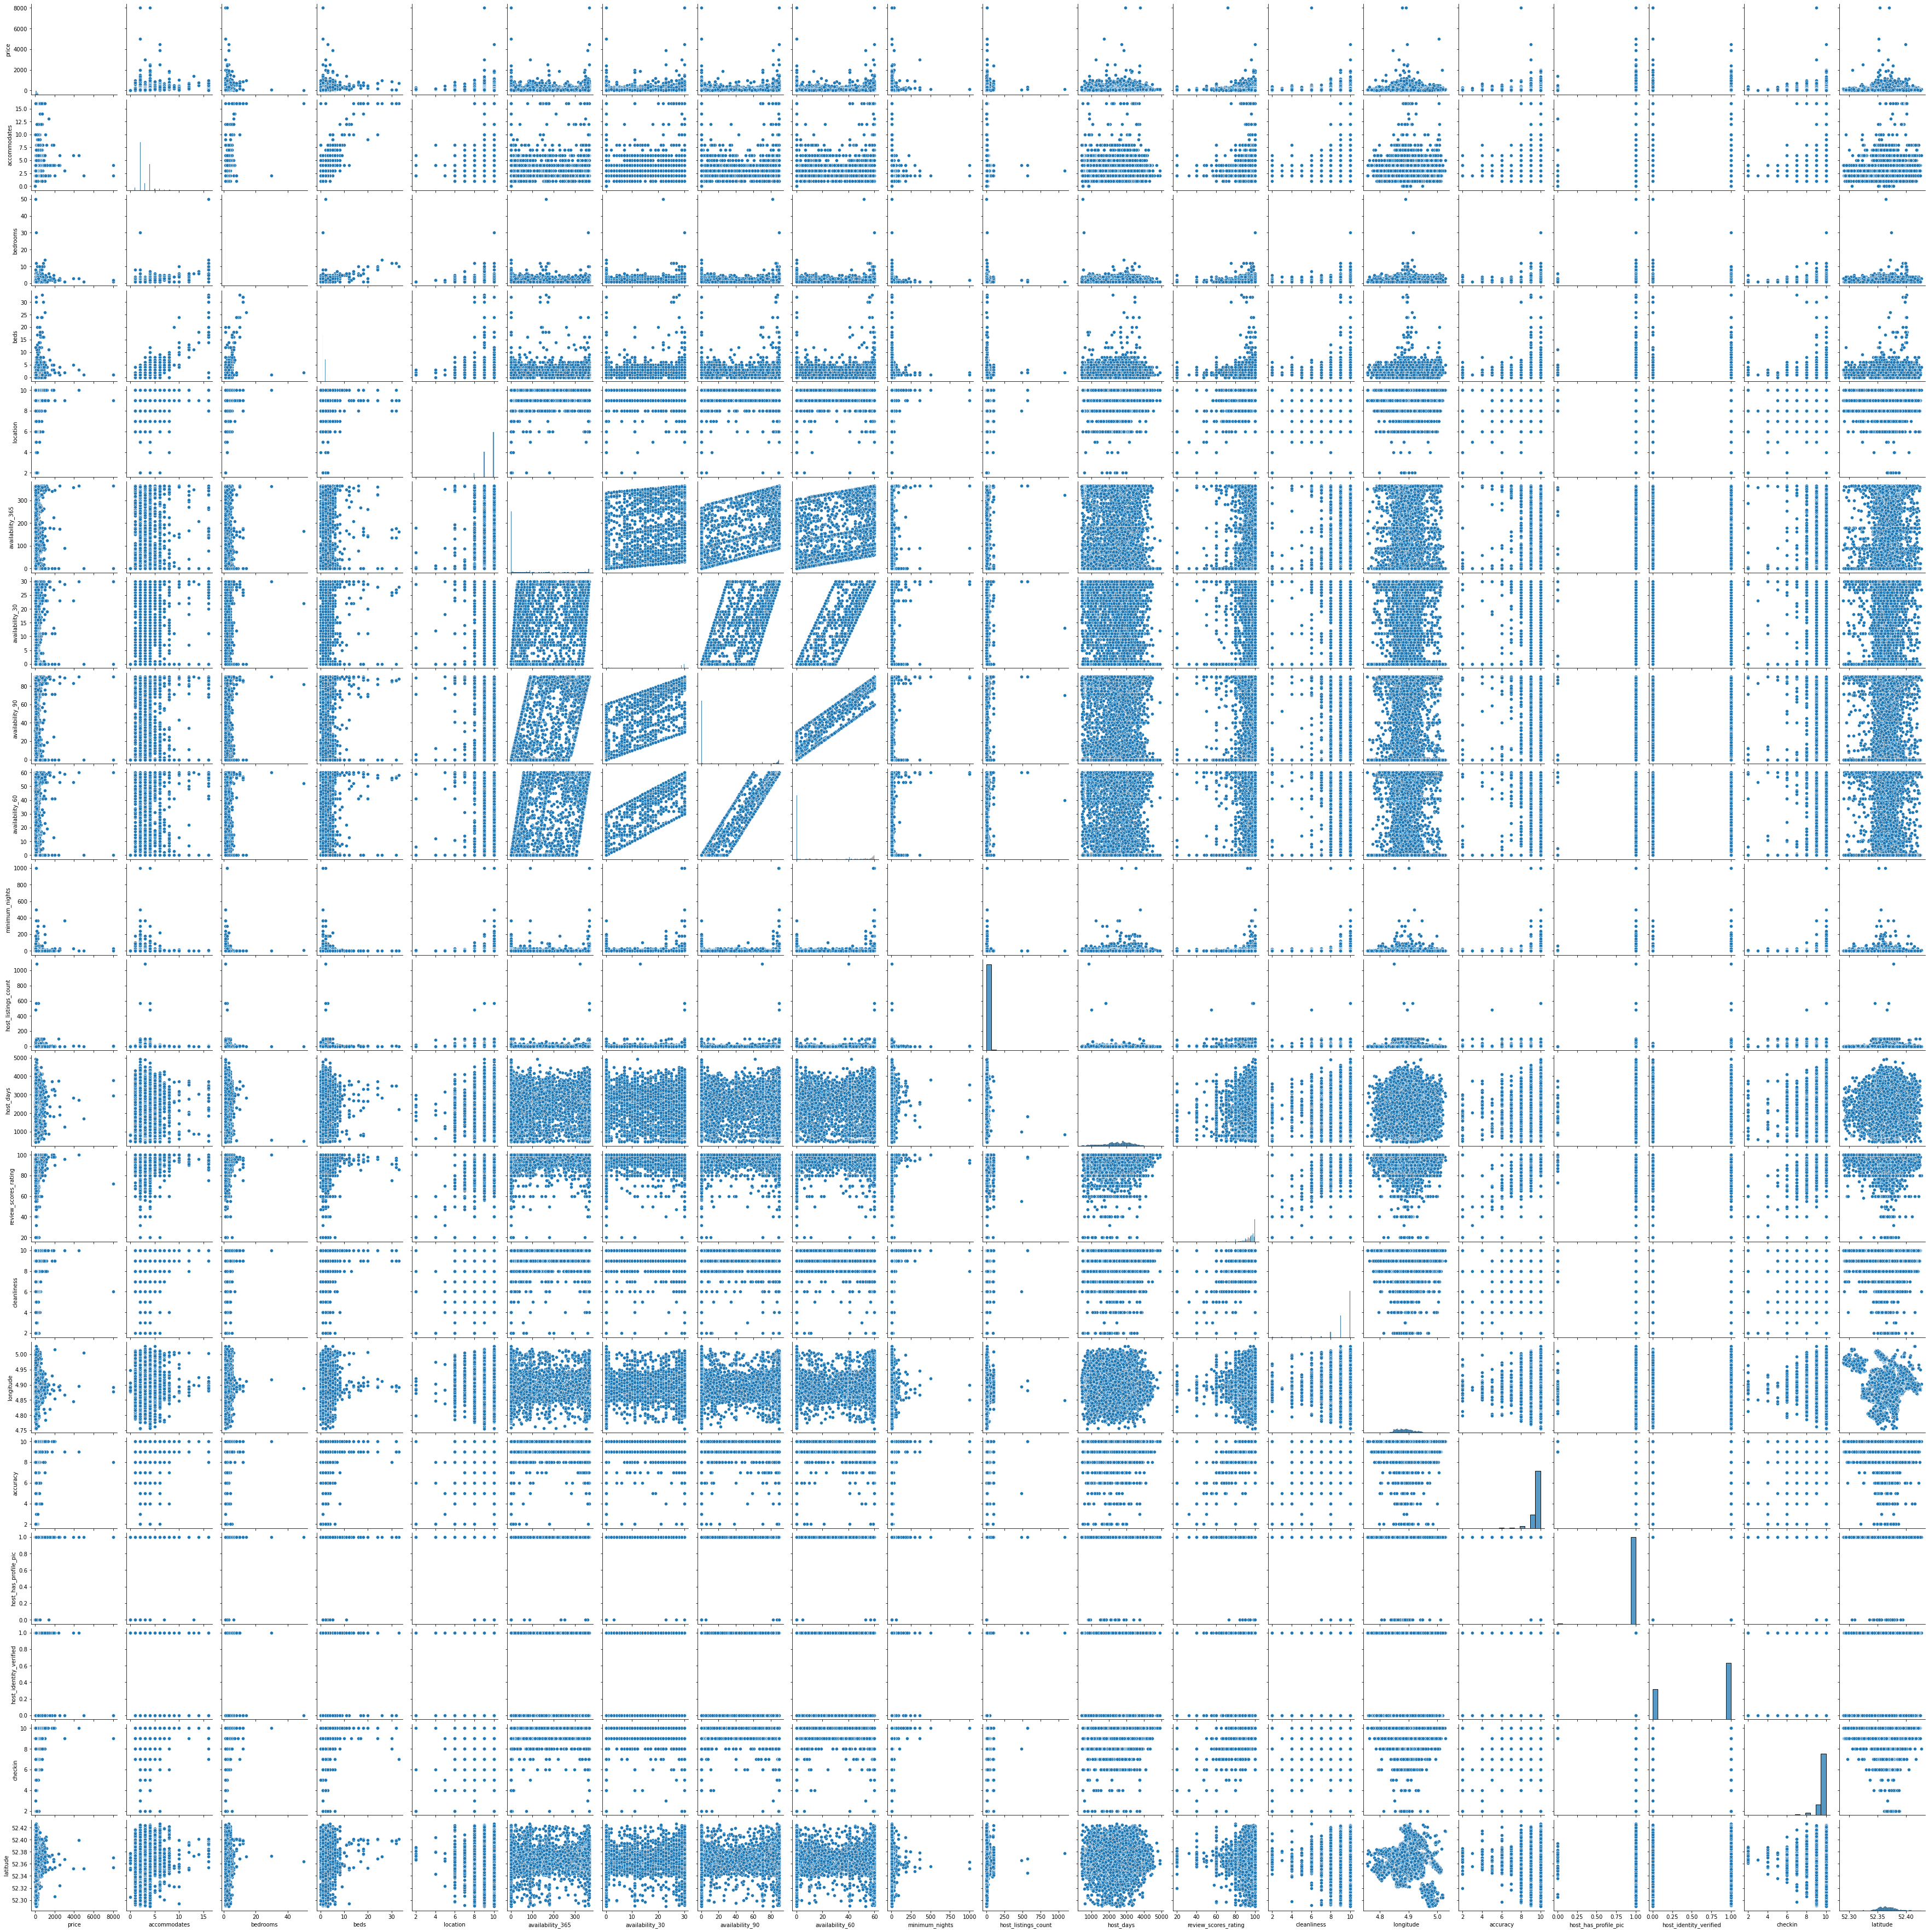

In [29]:
sns.pairplot(new_df)

In [30]:
##encoding categorical variable
dummies=pd.get_dummies(new_df.room_type).rename(columns=lambda x: 'room_' + x.split()[0])
new_df= pd.concat([new_df, dummies], axis='columns')
new_df=new_df.drop(['room_type','room_Shared'],axis='columns')#dropping room type column and one of the subitems(room_Shared) to prevent duplication 
new_df.head()

price  accommodates  bedrooms  beds  location  availability_365  \
0   59.0             2       1.0   2.0       9.0               123   
1  236.0             2       1.0   1.0      10.0                 3   
2  125.0             3       1.0   1.0      10.0                33   
3  135.0             2       1.0   1.0      10.0               219   
4   75.0             2       1.0   1.0      10.0               346   

   availability_30  availability_90  availability_60  minimum_nights  \
0               12               62               42               3   
1                3                3                3               1   
2                7                7                7              14   
3               26               84               56               2   
4               28               88               58               2   

   host_listings_count  host_days  review_scores_rating  cleanliness  \
0                  1.0     4917.0                  98.0         10.0   
1                  2.0     4483.0                  89.0         10.0   
2                  2.0     4495.0                 100.0         10.0   
3                  1.0     4372.0                  99.0         10.0   
4                  2.0     4321.0                  97.0         10.0   

   longitude  accuracy  host_has_profile_pic  host_identity_verified  checkin  \
0    4.94142      10.0                   1.0                     1.0     10.0   
1    4.89354      10.0                   1.0                     1.0     10.0   
2    4.88339      10.0                   1.0                     0.0     10.0   
3    4.89188      10.0                   1.0                     1.0     10.0   
4    4.88953      10.0                   1.0                     1.0     10.0   

   latitude  room_Entire  room_Hotel  room_Private  
0  52.36575            0           0             1  
1  52.36509            0           0             1  
2  52.37297            1           0             0  
3  52.38761            0           0             1  
4  52.36610            0           0             1

In [31]:
new_df.shape

(18522, 23)

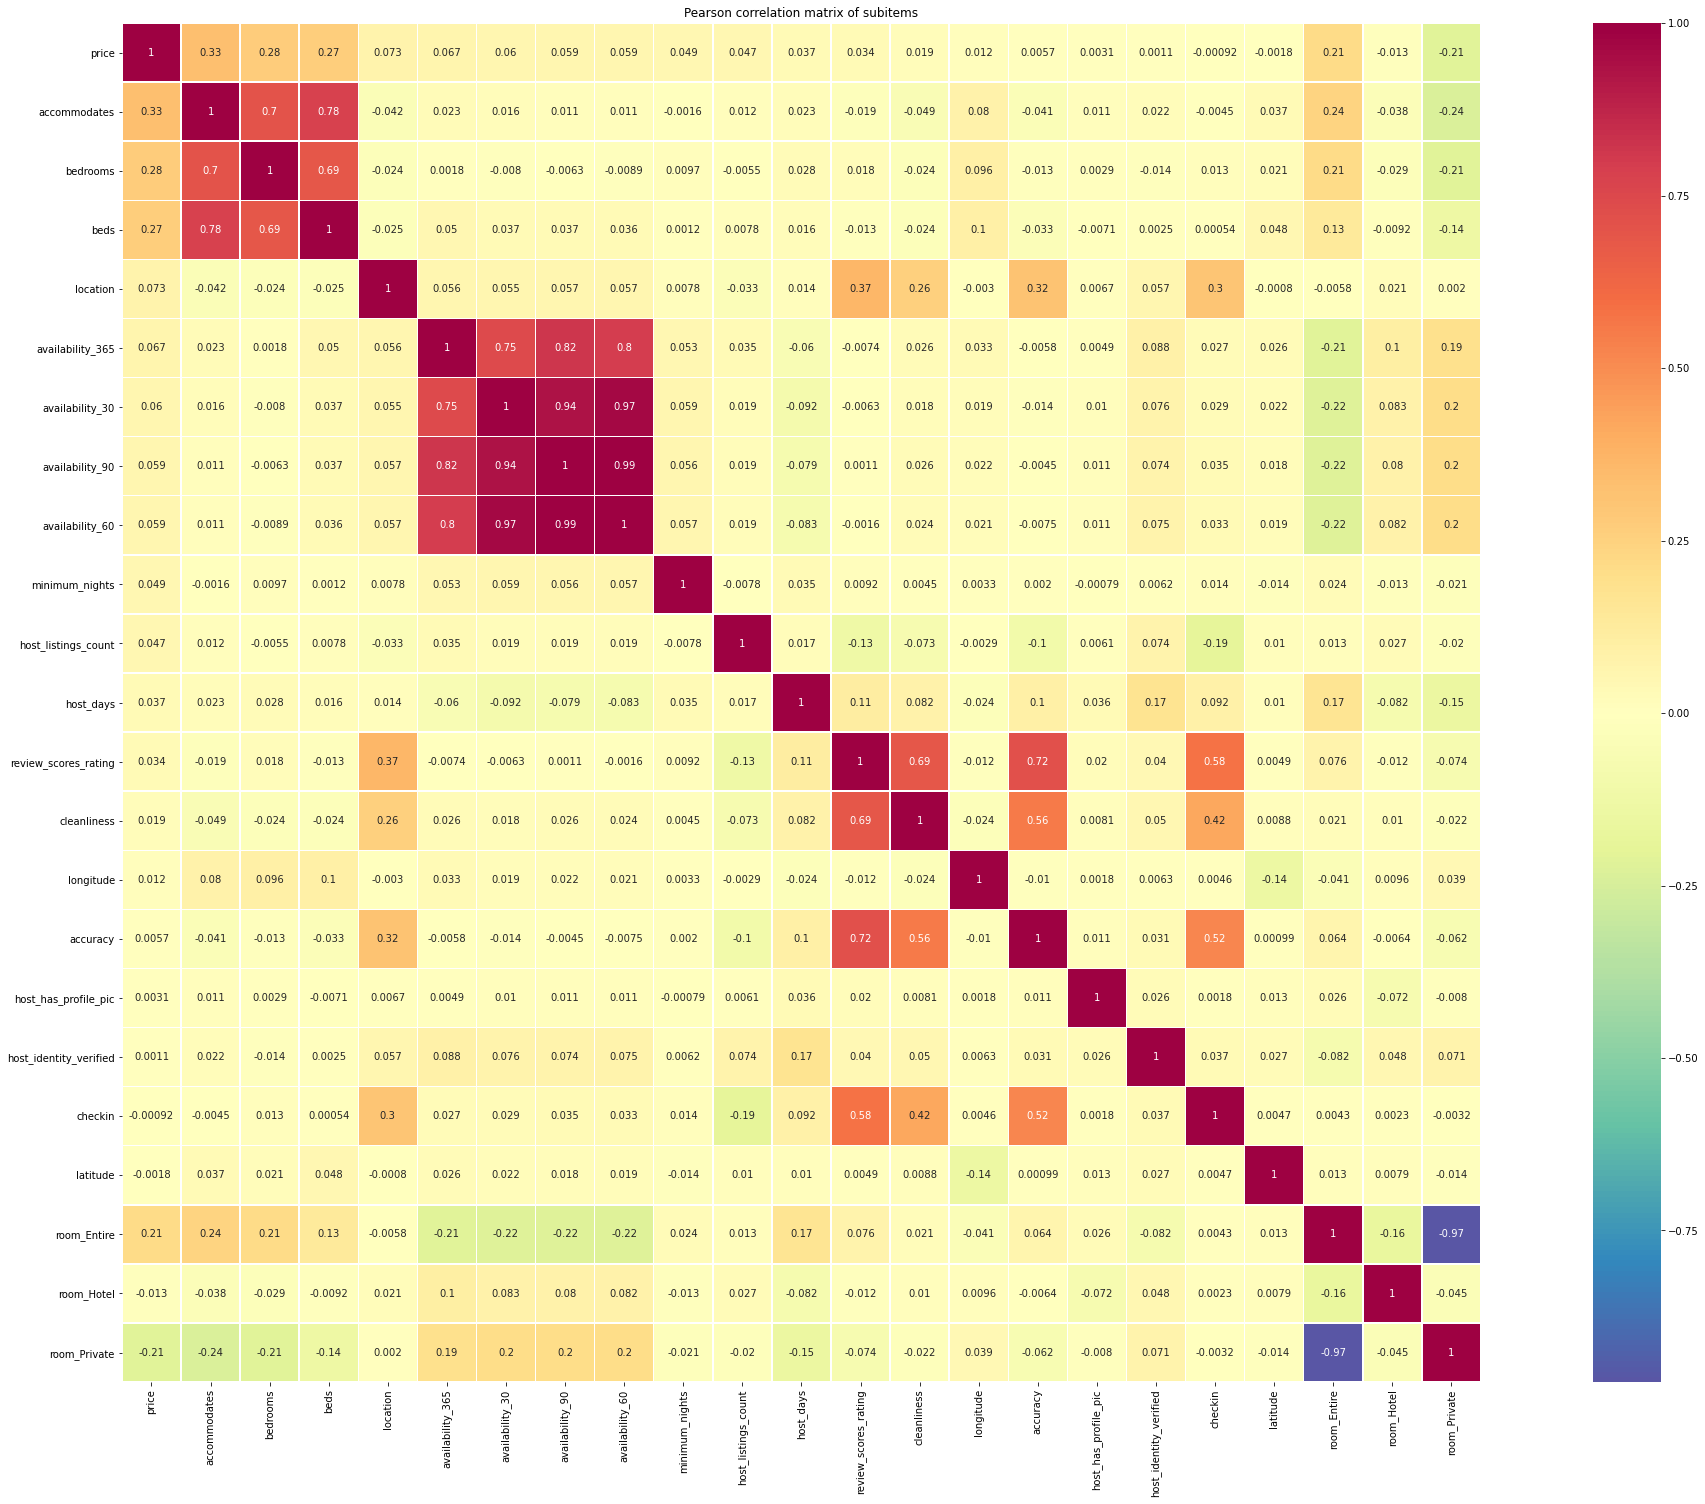

In [32]:
#Pair-wise Pearson correllation matrix between unique values of review_ratings variable 
fig,ax=plt.subplots(figsize=(40,25)) #specifying figure size 
C = new_df.corr() # correlation between unique values in review ratings 
sns.heatmap(C, square=True,annot=True,linewidths=0.5,center=0,cmap='Spectral_r');
ax.set_title('Pearson correlation matrix of subitems');

### Machine Learning Model to predict price 

In [33]:
new_df.head(2)

price  accommodates  bedrooms  beds  location  availability_365  \
0   59.0             2       1.0   2.0       9.0               123   
1  236.0             2       1.0   1.0      10.0                 3   

   availability_30  availability_90  availability_60  minimum_nights  \
0               12               62               42               3   
1                3                3                3               1   

   host_listings_count  host_days  review_scores_rating  cleanliness  \
0                  1.0     4917.0                  98.0         10.0   
1                  2.0     4483.0                  89.0         10.0   

   longitude  accuracy  host_has_profile_pic  host_identity_verified  checkin  \
0    4.94142      10.0                   1.0                     1.0     10.0   
1    4.89354      10.0                   1.0                     1.0     10.0   

   latitude  room_Entire  room_Hotel  room_Private  
0  52.36575            0           0             1  
1  52.36509            0           0             1

In [34]:
# move tagret column to last position 
new_cols = [col for col in df.columns if col != 'price'] + ['price']
df= df[new_cols]
df.head()

id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1  20168       Studio with private bathroom in the centre 1    59484   
2  25428    Lovely apt in City Centre (w.lift) near Jordaan    56142   
3  27886  Romantic, stylish B&B houseboat in canal district    97647   
4  28871                            Comfortable double room   124245   

   host_name host_since host_acceptance_rate  host_is_superhost  \
0     Daniel 2008-09-24                 100%                1.0   
1  Alexander 2009-12-02                 100%                0.0   
2       Joan 2009-11-20                  57%                1.0   
3       Flip 2010-03-23                 100%                1.0   
4      Edwin 2010-05-13                  92%                1.0   

    host_neighbourhood  host_listings_count  host_has_profile_pic  \
0       Indische Buurt                  1.0                   1.0   
1       Grachtengordel                  2.0                   1.0   
2       Grachtengordel                  2.0                   1.0   
3  Westelijke Eilanden                  1.0                   1.0   
4    Amsterdam Centrum                  2.0                   1.0   

   host_identity_verified                  neighbourhood_cleansed  latitude  \
0                     1.0  Oostelijk Havengebied - Indische Buurt  52.36575   
1                     1.0                            Centrum-Oost  52.36509   
2                     0.0                            Centrum-West  52.37297   
3                     1.0                            Centrum-West  52.38761   
4                     1.0                            Centrum-Oost  52.36610   

   longitude              property_type        room_type  accommodates  \
0    4.94142  Private room in apartment     Private room             2   
1    4.89354  Private room in townhouse     Private room             2   
2    4.88339           Entire apartment  Entire home/apt             3   
3    4.89188  Private room in houseboat     Private room             2   
4    4.88953  Private room in apartment     Private room             2   

   bedrooms  beds  minimum_nights  maximum_nights  availability_30  \
0       1.0   2.0               3            1125               12   
1       1.0   1.0               1             365                3   
2       1.0   1.0              14             180                7   
3       1.0   1.0               2             730               26   
4       1.0   1.0               2            1825               28   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               42               62               123                278   
1                3                3                 3                339   
2                7                7                33                  5   
3               56               84               219                219   
4               58               88               346                336   

   number_of_reviews_ltm first_review last_review  review_scores_rating  \
0                      1   2009-03-30  2020-02-14                  98.0   
1                     31   2010-03-02  2020-04-09                  89.0   
2                      2   2018-01-21  2020-02-09                 100.0   
3                     12   2012-01-09  2020-07-25                  99.0   
4                     18   2010-08-22  2020-09-20                  97.0   

   accuracy  cleanliness  checkin  communication  location  value  \
0      10.0         10.0     10.0           10.0       9.0   10.0   
1      10.0         10.0     10.0           10.0      10.0    9.0   
2      10.0         10.0     10.0           10.0      10.0   10.0   
3      10.0         10.0     10.0           10.0      10.0   10.0   
4      10.0         10.0     10.0           10.0      10.0   10.0   

   instant_bookable  reviews_per_month  host_days  price  
0                 1             

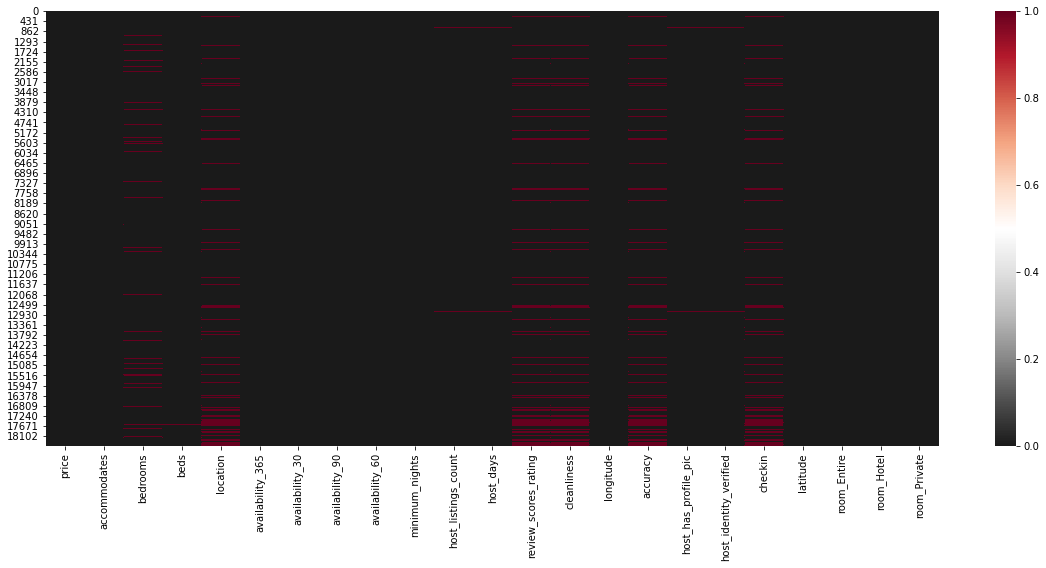

In [35]:
plt.figure(figsize=(20,8)) #specifying figure size 
sns.heatmap(new_df.isnull(), cbar=True,cmap='RdGy_r');

In [36]:
new_df.isna().sum()




price                        0
accommodates                 0
bedrooms                  1014
beds                       107
location                  2636
availability_365             0
availability_30              0
availability_90              0
availability_60              0
minimum_nights               0
host_listings_count         55
host_days                   55
review_scores_rating      2620
cleanliness               2630
longitude                    0
accuracy                  2630
host_has_profile_pic        55
host_identity_verified      55
checkin                   2638
latitude                     0
room_Entire                  0
room_Hotel                   0
room_Private                 0
dtype: int64

In [37]:
new_df=new_df.dropna()
new_df.shape

(14968, 23)

In [38]:
X= new_df.drop(['price'],axis=1)

y= new_df['price']

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


scaler_x=StandardScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)


scaler_y=StandardScaler()
y=y.values.reshape(-1,1)
y_scaled=scaler_y.fit(y)
y_scaled=scaler_y.transform(y)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

In [41]:
# define model
model =  RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

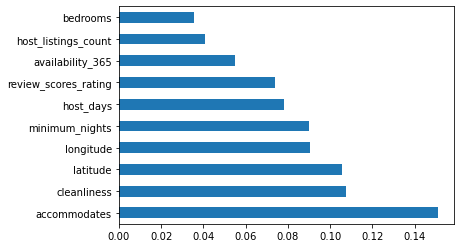

In [42]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [43]:
y_pred=model.predict(X_test)


In [44]:
from sklearn import metrics
from math import sqrt
print('MAE:', str(round(metrics.mean_absolute_error(y_test, y_pred),2)))
print('MSE:', str(round(metrics.mean_squared_error(y_test, y_pred),2)))
print('RMSE:' + str(round(sqrt(metrics.mean_squared_error(y_test, y_pred)),2)))


MAE: 0.38
MSE: 0.56
RMSE:0.75


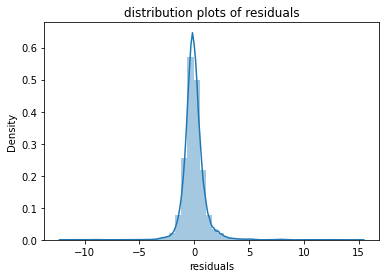

In [45]:
sns.distplot(y_test-y_pred)
plt.xlabel('residuals')
plt.title('distribution plots of residuals');